In [31]:
import sys
sys.path.append('src/') # add source with all scripts

import pandas as pd
import DeepPhenotyping_functions as func
from bs4 import BeautifulSoup
import importlib as imp
imp.reload(func)

C:\Users\levrex\Desktop\DeepPhenotypingHPO
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\clinphen_src\data\hpo_synonyms.txt


2020-12-21 21:15:04,173 - txt2hpo - INFO - txt2hpo 0.2.2
2020-12-21 21:15:04,239 - txt2hpo - INFO - Using configuration file: \Users\levrex\.txt2hpo\txt2hpo.ini
2020-12-21 21:15:05,271 - phenopy - INFO - checking if config file exists: \Users\levrex\.phenopy
2020-12-21 21:15:05,285 - phenopy - INFO - phenopy 0.4.2
2020-12-21 21:15:05,314 - phenopy - INFO - Using configuration file: \Users\levrex\.phenopy\phenopy.ini
2020-12-21 21:15:33,668 - txt2hpo - INFO - Using scispaCy language model



<module 'DeepPhenotyping_functions' from 'src\\DeepPhenotyping_functions.py'>

In [1]:
from phrank.phrank import __version__
print(__version__) # alabaster==0.7.10

ImportError: cannot import name '__version__'

# Dataset #1 IARS

In [59]:
d_IARS_valid = {
    'All' : ['validation/021020_1758_HPODP_proj7_art92_pat69-export.html',
                            'validation/021020_1758_HPODP_proj7_art92_pat70-export.html',
                            'validation/021020_1758_HPODP_proj7_art92_pat71-export.html',
                            'validation/021020_1758_HPODP_proj7_art103_pat72-export.html', 
                            'validation/021020_1758_HPODP_proj7_art103_pat73-export.html', 
                            'validation/021020_1758_HPODP_proj7_art103_pat74-export.html', 
                            'validation/021020_1758_HPODP_proj7_art103_pat75-export.html',
                            'validation/021020_1757_HPODP_proj7_art113_pat67-export.html',
                            'validation/021020_1757_HPODP_proj7_art93_pat68-export.html'
                              ],
}

dataset = 'IARS'

In [60]:

case_study = 'All' # 'Orenstein et al, 2016' 'Musante et al, 2017' 'Kopajtich et al, 2016'

columns = ['Patient', 'ix', 'HPO-id', 'Description', 'assoc genes']
df_valid = pd.DataFrame(columns=columns)

for file_name in d_IARS_valid[case_study]:
    
    with open('Phenotool/' + file_name, 'r') as f:
        contents = f.read()

        soup = BeautifulSoup(contents, 'lxml')

        tables = soup.findAll("table")

        cnt = 0
        for table in tables:
            if table.findParent("table") is None:
                cnt += 1
        ths = soup.find_all('td')
        pat_id = ths[4].text
        #pat_id = pat_id.split(' ')[0]
        df1 = func.parseTable(table)
        df1.columns = ['ix', 'HPO-id', 'Description', 'assoc genes']
        #print(df1)
        print('Patient ', pat_id, ' File Name', file_name)
        df1['Patient'] = [pat_id for i in range(len(df1))]
        #print(df1)
        df_valid = pd.concat([df_valid, df1])

## Ignore entity linking for now!! 
#df_valid['Patient'] = df_valid['Patient'].apply(lambda x : 'all')
df_valid.head()

Patient  #65269 (ID: 69)  File Name validation/021020_1758_HPODP_proj7_art92_pat69-export.html
Patient  #85880 (ID: 70)  File Name validation/021020_1758_HPODP_proj7_art92_pat70-export.html
Patient  #83921 (ID: 71)  File Name validation/021020_1758_HPODP_proj7_art92_pat71-export.html
Patient  Family 1-III:4 (ID: 72)  File Name validation/021020_1758_HPODP_proj7_art103_pat72-export.html
Patient  Family 1-III:10 (ID: 73)  File Name validation/021020_1758_HPODP_proj7_art103_pat73-export.html
Patient  Family 1-III:9 (ID: 74)  File Name validation/021020_1758_HPODP_proj7_art103_pat74-export.html
Patient  Family 1-III:11 (ID: 75)  File Name validation/021020_1758_HPODP_proj7_art103_pat75-export.html
Patient  Index patient (ID: 67)  File Name validation/021020_1757_HPODP_proj7_art113_pat67-export.html
Patient  Index patient (ID: 68)  File Name validation/021020_1757_HPODP_proj7_art93_pat68-export.html


,Patient,ix,HPO-id,Description,assoc genes
0,#65269 (ID: 69),1,HP:0000152,Abnormality of head or neck,2727
1,#65269 (ID: 69),2,HP:0000234,Abnormality of the head,2705
2,#65269 (ID: 69),3,HP:0000929,Abnormality of the skull,1887
3,#65269 (ID: 69),4,HP:0000240,Abnormality of skull size,1267
4,#65269 (ID: 69),5,HP:0040195,Decreased head circumference,1026


In [61]:
df_valid[df_valid['Description'].str.contains('ILD')]

,Patient,ix,HPO-id,Description,assoc genes


## Convert HTML table to PhenoTable
Long table needs to be translated to a wide table with HPO codes as header

In [62]:
def generate_pheno_profiles(df_valid):
    d_pat = {}
    for pat in df_valid['Patient'].unique():
        d_pat[pat] = df_valid[df_valid['Patient']==pat]['HPO-id'].unique()
    return d_pat

d_pat = generate_pheno_profiles(df_valid)
df_pheno = func.getPatientProfileTable(d_pat)
df_pheno.index = df_pheno.index.set_names(['Id'])
df_pheno = df_pheno.reset_index()
df_pheno

,Id,HP:0040195,HP:0008067,HP:0012758,HP:0410042,HP:0031075,HP:0031703,HP:0002492,HP:0000234,HP:0001250,...,HP:0003256,HP:0006579,HP:0002012,HP:0011923,HP:0025032,HP:0004322,HP:0011297,HP:0025031,HP:0000359,HP:0011471
0,#65269 (ID: 69),1,0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,0,1,0,1
1,#85880 (ID: 70),1,0,1,1,0,1,0,1,0,...,1,0,1,1,0,0,0,1,1,0
2,#83921 (ID: 71),1,0,0,1,0,0,0,1,0,...,0,0,1,1,1,0,0,1,0,1
3,Family 1-III:4 (ID: 72),1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,Family 1-III:10 (ID: 73),1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
5,Family 1-III:9 (ID: 74),1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
6,Family 1-III:11 (ID: 75),1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7,Index patient (ID: 67),1,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,1,0,0
8,Index patient (ID: 68),1,1,1,1,1,0,0,1,0,...,0,1,1,0,1,0,1,1,0,0


## infer HPO

In [63]:
import columns_linked_to_hpo


def infer_HPO_translate(row, column_to_hpo):
    hpo_list = []
    cols = list(row.index)
    for i in cols:
        val = row[i]
        #print(val)
        if val == 1:
            col = i.lower().strip()
            if (col in column_to_hpo.keys()) == False :
                print(col, col in column_to_hpo.keys())
            if col in column_to_hpo.keys():
                if type(column_to_hpo[col]) == list:
                    hpo_list.extend(column_to_hpo[col])
                else :
                    hpo_list.append(column_to_hpo[col])
    return hpo_list

def infer_HPO(row):
    hpo_list = []
    cols = list(row.index)
    for i in cols:
        val = row[i]
        if val == 1:
            hpo_list.append(i)
    return hpo_list

if dataset == 'IARS':
    hp_patients = list(df_pheno.apply(lambda x: infer_HPO(x) , axis= 1))
else :
    hp_patients = list(df_all.apply(lambda x: infer_HPO_translate(x, columns_linked_to_hpo.column_to_hpo) , axis= 1))
#hp_patients

# CLUSTERING 1 : HRSS clustering

In [33]:
import os
from phenopy import generate_annotated_hpo_network
from phenopy.score import Scorer

# data directory
phenopy_data_directory = os.path.join(os.getenv('HOMEPATH'), '.phenopy\\data')

# files used in building the annotated HPO network
obo_file = os.path.join(phenopy_data_directory, 'hp.obo')
disease_to_phenotype_file = os.path.join(phenopy_data_directory, 'phenotype.hpoa')

# if you have a custom ages_distribution_file, you can set it here.
#ages_distribution_file = os.path.join(phenopy_data_directory, 'xa_age_stats_oct052019.tsv')

hpo_network, alt2prim, disease_records = \
    generate_annotated_hpo_network(obo_file,
                                   disease_to_phenotype_file,
                                   #ages_distribution_file=ages_distribution_file
                                   )

scorer = Scorer(hpo_network)


In [9]:
import obonet

url = 'phenopy_mod/.phenopy/data/hp.obo'
graph = obonet.read_obo(url)

id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}

## Assess whether phenotypic specificity is best way foreward

In [13]:
cnt = 0
for id_, data in hpo_network.nodes(data=True):
    #print(data.get('name'))
    print(hpo_network.nodes[id_])
    if 'ic' in hpo_network.nodes[id_]:
        ic = hpo_network.nodes[id_]['ic']
        print('IC=', ic)
        if ic != 0:
            break
            #l_synonyms_new.append(str(name_to_id[data.get('name')]) + '\t' + syn)
            #break
    cnt +=1
    #break
    if cnt == 500:
        break
    
    #print(id_)
    

{'name': 'All', 'comment': 'Root of all terms in the Human Phenotype Ontology.', 'xref': ['UMLS:C0444868'], 'ic': 0.0, 'disease_weights': {}, 'depth': 0}
IC= 0.0
{'name': 'Abnormality of body height', 'def': '"Deviation from the norm of height with respect to that which is expected according to age and gender norms." [HPO:probinson]', 'synonym': ['"Abnormality of body height" EXACT layperson []'], 'xref': ['UMLS:C4025901'], 'is_a': ['HP:0001507'], 'created_by': 'peter', 'creation_date': '2008-02-27T02:20:00Z', 'ic': 1.8958170531054654, 'disease_weights': {}, 'depth': 3, 'synonyms': ['Abnormality of body height']}
IC= 1.8958170531054654


#### Positive control

In [34]:
terms_a = ['HP:0000377']# wide nasal bridge  #hp_patients[0]
terms_b = ['HP:0000153']# abnormality #hp_patients[1]

print(scorer.score_term_sets_basic(terms_a, terms_b))

0.0


## Construct distance matrix with HRSS 

In [65]:
len(hp_patients), dataset

(9, 'IARS')

In [27]:
l_datasets = ['ACTB', 'ACTB_ACTG1', 'ACTG1']
dataset = l_datasets[1]

In [35]:
l = []
for j in range(len(hp_patients)):
    for i in range(len(hp_patients)):
        l.append(scorer.score_term_sets_basic(hp_patients[i], hp_patients[j]))

l_cleaned = [x if str(x) != 'nan' else 0 for x in l ]

l2 = []
n = len(hp_patients)
for j in range(len(hp_patients)):
    l2.append(l_cleaned[n*j:n+n*j])
df_hrss = pd.DataFrame(l2)
df_hrss.to_csv('data/deepdata/distance_matrix_%s_hrss.csv' % (dataset)) # Save distance matrix

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Perform K-means clustering

### plain binary metric

In [200]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

dataset = 'hamming'
cols = list(df_all.loc[:, ~df_all.columns.isin(['Category', 'Id', 'Protein', 'Origin'])].columns)

bool_dist = ['hamming', 'jaccard', 'dice', 'euclidean']

distance = bool_dist[1]

df = df_all.copy()
pairwise = pd.DataFrame(
    squareform(pdist(df[cols], metric=distance)),
    columns = df['Id'],
    index = df['Id']
    
)
df_hrss = df[cols].copy()
X_trans = pairwise.values 

### HRSS

In [11]:
l_datasets = ['ACTB', 'ACTB_ACTG1', 'ACTB_ACTG1_NAT6', 'ACTG1', 'IARS']
dataset = l_datasets[4]
df_hrss = pd.read_csv('data/deepdata/distance_matrix_%s_hrss.csv'  % (dataset), index_col=0)
#df_hrss
#df_pheno = df_actg1.copy()

### Decide nr of clusters with elbow method

In [24]:
import re

m = re.search('([^/]*\.py$)', 'eth/te22ij/lalala.py')
print(m.group(1))

lalala.py


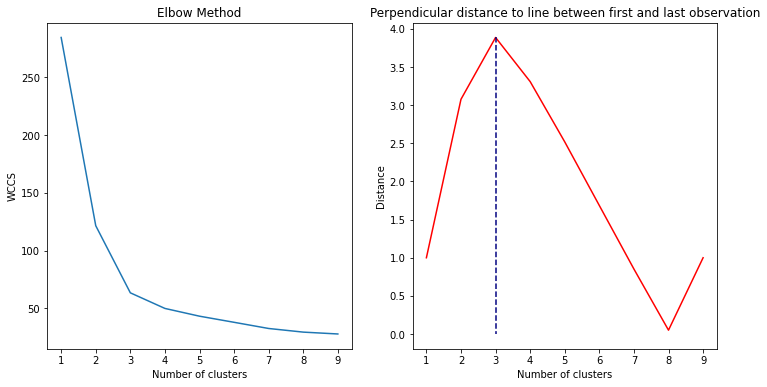

Nr of clusters = 3


In [32]:
if dataset in l_datasets:
    X_trans = df_hrss[df_hrss.columns[:111]]
elif dataset=='IARS':
    X_trans = df_hrss
k = func.elbowMethod(X_trans, method='kmeans', n=9)
print('Nr of clusters = %s' % (k))

### Perform K-means

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k =4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_trans)
#plt.scatter(X_trans.values[:,0], X_trans.values[:,1])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

df_hrss['cluster'] = kmeans.fit_predict(X_trans)

### Visualize clusters

In [38]:
from bokeh.palettes import Colorblind8
from bokeh.palettes import Spectral10
#import importlib as imp
#imp.reload(func)

l_order = ['Gain Of Function (ACTG1)', 'Loss of function (ACTG1)', 'Other (ACTG1)', 'Gain Of Function (ACTB)', 'Loss of function (ACTB)', 'Other (ACTB)']
#func.makePCA(X_trans, df_all['Id'],   df_all['Category'], title='_Euclidean', pal=Colorblind8, l_order=l_order, radius=1, seed=2)

# X_trans df_hrss[df_hrss.columns[:111]].values
func.makeTSNE_Cluster2(X_trans, df_all['Id'],  df_hrss['cluster'].astype(str), df_all['Category'], l_order=l_order,
                      title='All_Jaccard', clusters=4, pal=[Colorblind8, Colorblind8], seed=15, color_on_spot=False)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 111 samples in 0.001s...
[t-SNE] Computed neighbors for 111 samples in 0.173s...
[t-SNE] Computed conditional probabilities for sample 111 / 111
[t-SNE] Mean sigma: 0.689691
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.045925
[t-SNE] KL divergence after 1000 iterations: 0.135361
KMeans(n_clusters=4, random_state=15)

TSNE figure saved under location: TSNE/Kmeans_phenoMap_tsne_All_Jaccard.html


### alternative UMAP
You have to first download umap!

In [146]:
import umap
import matplotlib.pyplot as plt

standard_embedding = umap.UMAP(random_state=42, n_neighbors=30, min_dist=0.3, metric='euclidean').fit_transform(df_hrss[df_hrss.columns[:111]].values)

plt.figure(figsize=(15,10))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c= list(pd.Categorical(df_all['Category']).codes), s=100, cmap='Spectral') # c=mnist.target.astype(int),
plt.legend(['Gain Of Function (ACTB)', 'Gain Of Function (ACTG1)', 'Loss of function (ACTB)', 'Loss of function (ACTG1)', 'Other (ACTB)', 'Other (ACTG1)'])

## Explore Clusters
### Plot cluster membership

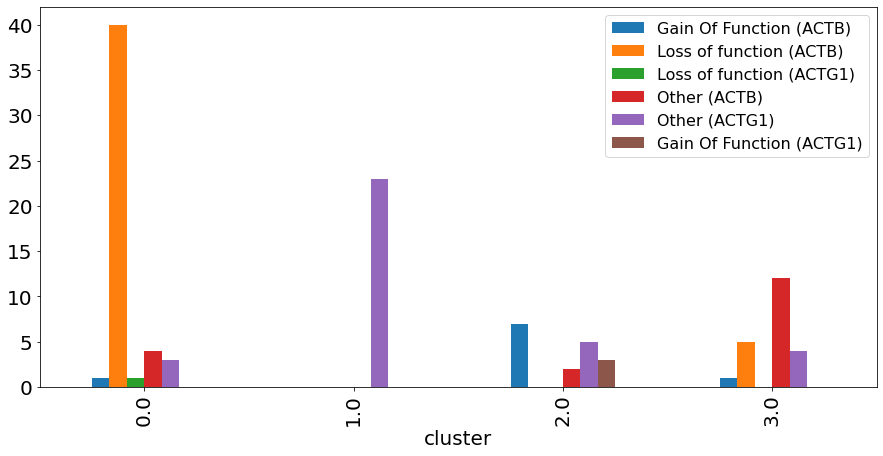

In [51]:
import matplotlib.pyplot as plt
#X = df_actg1.loc[:, cols].values # df_actg1.loc[:, cols].values # 
#X_trans = pca.fit_transform(X)
plt.rcParams.update({'font.size': 20})



d = {'cat': df_all['Category'], 'cluster': df_hrss['cluster']}
df_bar = pd.DataFrame(data=d)
#df_bar = df_bar.sample(frac=1)
fig, ax = plt.subplots(figsize=(15,7))
df_bar.groupby(['cluster', 'cat']).size().unstack().plot(ax=ax, kind = 'bar') 
plt.legend(loc=1, prop={'size': 16})

### Rank phenotypes

In [52]:
explore_df =  pd.concat([df_pheno, df_hrss['cluster'].astype(str)], axis=1) #  pd.Series([1 for i in range(len(df_pheno))], name='cluster')
l_ignore = ['Category', 'Id', 'Protein', 'Origin'] # , 'cluster'
columns = list(explore_df.loc[:, ~explore_df.columns.isin(l_ignore)])

l_ignore.append('cluster')
columns_raw = list(explore_df.loc[:, ~explore_df.columns.isin(l_ignore)])
#explore_df.head()

#### Rank by occurrence

In [75]:
import obonet

url = 'phenopy_mod/.phenopy/data/hp.obo'
graph = obonet.read_obo(url)

id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}

In [76]:
if dataset == 'IARS':
    lbls = {col : id_to_name[col] for col in columns_raw }
else :
    lbls = columns_raw
#lbls

### Create HPO2Gene file

In [141]:
#df_hpoa[['HPO_ID', 'DiseaseName']].to_csv("hpo/disease_2_pheno.txt", sep='\t', header=False, index=False)
df_hpo[['#Format: HPO-id', 'entrez-gene-symbol']].to_csv("hpo/pheno_2_gene.txt", sep='\t', header=False, index=False)
#annotated_table.to_csv("results/%s/2_phenotypes/Table_%s_%s_%s.csv" % (title, str(index), pheno, title), sep='|', index=False)
#explore_df = explore_df.loc[:, (explore_df==0).mean() < .8]

### Import table that links phenotypes to genes

In [44]:
## Load HPO to Genes file
df_hpo = pd.read_table(r'hpo/util/annotation/phenotype_to_genes.txt', sep='\t|<tab>', engine='python') # phenotype_to_genes.txt

### Calculate weight (nr of associated genes)

In [45]:
import columns_linked_to_hpo
#imp.reload(func)

## Calculate Weights
l_cols = df_pheno.columns

if dataset == 'IARS':
    #columns_raw = columns_raw[:-1]
    weight_list = func.getNumberOfGenes(df_pheno[columns_raw].columns, df_hpo=df_hpo)
else : 
    weight_list = func.getNumberOfGenesTranslation(df_pheno[columns_raw].columns, col2hpo=columns_linked_to_hpo.column_to_hpo, df_hpo=df_hpo)
    

persistent embryonic sructures not found
polyarthralgia not found


### How many patients 
- to assess the fraction of patients

In [124]:
#l_cols

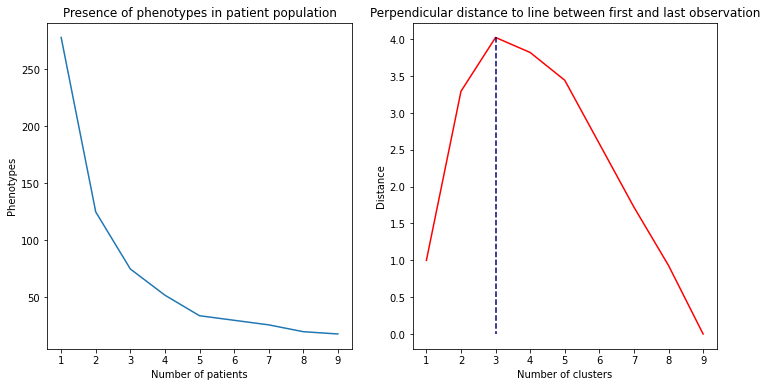

3


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm 
imp.reload(func)

name='IARS'

n = len(explore_df)


df = explore_df[columns].copy()
    
k = func.defineOptimalNrOfPatients(df, 10)

print(k)
#plt.xlim((0,40))

(0.0, 9.0)

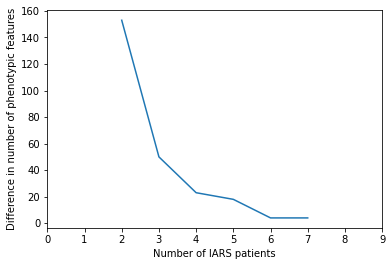

In [82]:
l_y = func.plotPhenotypesPatients(explore_df[columns], name=dataset)
plt.xlim(0,9)

In [61]:
explore_df[explore_df['cluster']=='1']

,Category,Id,Protein,High frequency hearing loss,Short stature,microcephaly,hearing loss,ID,Developmental delay (Global),Motor Delay,...,Polyarthralgia,Hepatomegaly,Hypothyroidism,Leukocytosis,thrombocytopenia,Asthma,Strabismus,Growth hormone deficiency,Origin,cluster
11,Other (ACTG1),Patient B,p.Pro32Ser,1,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,ACTG1,1
12,Other (ACTG1),Family 6,p.Pro264Leu,1,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,ACTG1,1
13,Other (ACTG1),Chinese family 1,p.Ile122Val,1,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,ACTG1,1
14,Other (ACTG1),Chinese family 2,p.Lys213Arg,1,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,ACTG1,1
15,Other (ACTG1),Family #1,p.Ile34Met,1,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,ACTG1,1
16,Other (ACTG1),Family #2,p.Arg37His,1,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,ACTG1,1
17,Other (ACTG1),Family #4,p.Met82Ile,1,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,ACTG1,1
18,Other (ACTG1),Family #8,p.Ile165Val,1,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,ACTG1,1
19,Other (ACTG1),Family #11,p.His275Tyr,1,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,ACTG1,1
20,Other (ACTG1),Family #14/#15,p.Pro332Ser,1,0,0,1,0,0,0,...,0.0,0.0,0,0,0,0,0,0,ACTG1,1


### calculate Phenotypic Specificity

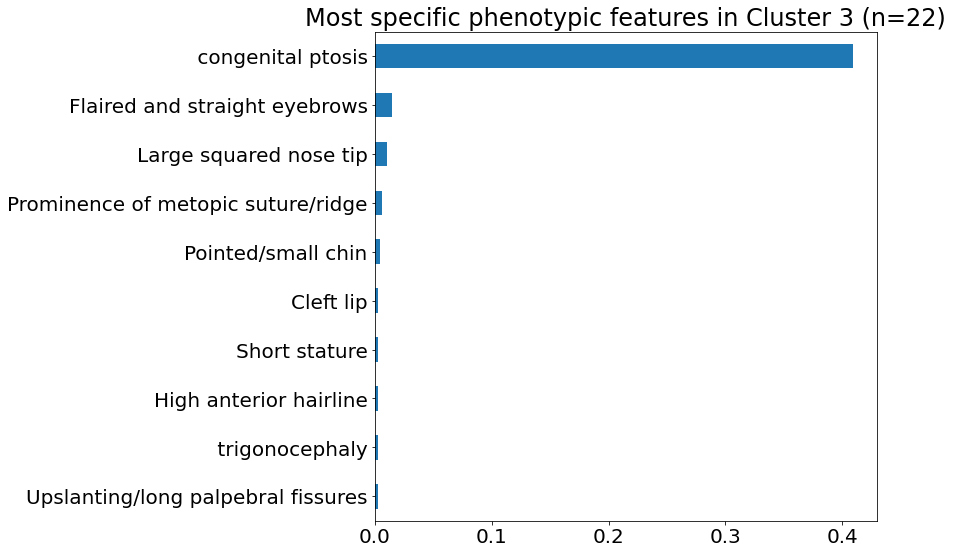

In [65]:
import matplotlib.pyplot as plt
imp.reload(func)

cluster = 3
N = len(explore_df[explore_df['cluster']==str(cluster)])

prob = func.PhenotypicSpecifictyOccurrence(explore_df[columns], weights=weight_list, cluster=str(cluster), topN=10, pat_frac=1, rename=False, divide_occurrence=True) # labels=lbls, 
pheno_ACTG = list(prob.index) # topN=10, 

prob.plot(kind='barh',figsize=(9,9), title='Most specific phenotypic features in Cluster %s (n=%s)' % (cluster, str(N)))
plt.show()

In [106]:
#prob.to_csv("hpo/disease_2_pheno.txt", sep='\t', header=False, index=False)
#pheno_ACTG

def translateToHPO(l_cols, col2hpo):
    """
    l_cols = column names (written phenotypes)
    """
    hpo_list = []
    for val in l_cols:
        col = val.lower().strip()
        #print(col)
        if col in col2hpo.keys():
            if type(col2hpo[col]) == list:
                hpo_list.extend([hpo for hpo in col2hpo[col]])
            else :
                hpo_list.append(col2hpo[col])
        #print(hpo)
    return hpo_list

col2hpo = columns_linked_to_hpo.column_to_hpo

hpo_list = translateToHPO(pheno_ACTG, col2hpo) # pheno_ACTG (filtered) or df_pheno.columns
#hpo_list

## Explore pathophysiology

### load HPOA

In [88]:
df_hpoa = pd.read_table(r'hpo/phenotype.hpoa', sep='\t', header=4, encoding = "ISO-8859-1")
print('Nr of HPO codes:', len(df_hpoa))
df_hpoa.head()

Nr of HPO codes: 199197


C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,#DatabaseID,DiseaseName,Qualifier,HPO_ID,Reference,Evidence,Onset,Frequency,Sex,Modifier,Aspect,Biocuration
0,OMIM:210100,"BETA-AMINOISOBUTYRIC ACID, URINARY EXCRETION OF",NaN,HP:0000007,OMIM:210100,IEA,NaN,NaN,NaN,NaN,I,HPO:iea[2009-02-17]
1,OMIM:210100,"BETA-AMINOISOBUTYRIC ACID, URINARY EXCRETION OF",NaN,HP:0003355,OMIM:210100,IEA,NaN,NaN,NaN,NaN,P,HPO:skoehler[2009-02-17]
2,OMIM:163600,NIPPLES INVERTED,NaN,HP:0000006,OMIM:163600,IEA,NaN,NaN,NaN,NaN,I,HPO:iea[2009-02-17]
3,OMIM:163600,NIPPLES INVERTED,NaN,HP:0003186,OMIM:163600,IEA,NaN,NaN,NaN,NaN,P,HPO:iea[2009-02-17]
4,OMIM:615763,"#615763 CORTICAL DYSPLASIA, COMPLEX, WITH OTHE...",NaN,HP:0002365,OMIM:615763,TAS,NaN,HP:0040283,NaN,NaN,P,HPO:skoehler[2014-08-24]


### Convert Entrez to Ensemble [ OLD FUNCTION ]

In [ ]:
#import sys
#import mygene
#def translateEnsembl(genes):
#    l_val = []
#    for gene in genes:
#        result = mg.query(gene, scopes="symbol", fields=["ensembl"], species="human", verbose=False)
#        hgnc_name = gene
#
#        for hit in result["hits"]:
#            if "ensembl" in hit and "gene" in hit["ensembl"]:
#                print("%s\t%s\n" % (hgnc_name, hit["ensembl"]["gene"]))
#                l_val.append(hit["ensembl"]["gene"])
#    return l_val
#
#
#l_ensembl = translateEnsembl(genes)

### Employ PHRANK

In [89]:
from phrank.phrank import Phrank
from phrank.phrank import utils as phrank_utils

# hpo/pheno_2_gene.txt
DAG="phrank/demo/data/hpodag.txt"
DISEASE_TO_PHENO="phrank/demo/data/disease_to_pheno.build127.txt"
DISEASE_TO_GENE="phrank/demo/data/gene_to_disease.build127.txt"
GENE_TO_PHENO="phrank/demo/data/gene_to_pheno.amelie.txt"
GENE_TO_PHENO='hpo/pheno_2_gene.txt'
p_hpo = Phrank(DAG, geneannotationsfile=GENE_TO_PHENO) # diseaseannotationsfile=DISEASE_TO_PHENO, diseasegenefile=DISEASE_TO_GENE

### Get assoc genes upon providing a phenotype

In [136]:
def get_assoc_genes(hpo_id, df_hpo, df_hpoa):
    """
    Get genes that correspond to the provided phenotype (HPO)
    """
    
    output_genes = list(df_hpo[df_hpo['#Format: HPO-id']==hpo_id]['entrez-gene-symbol'].unique())
    #l_diseases = list(df_hpo[df_hpo['#Format: HPO-id']==hpo_id]['disease-ID for link'].unique())
    #output_diseases = list(df_hpoa[df_hpoa['Reference'].isin(l_diseases)]['DiseaseName'].unique())
    #output_genes = list(df_hpo[df_hpo['Reference'].isin(l_diseases)]['entrez-gene-symbol'].unique())
    # output_diseases, 
    #pd.DataFrame(output_genes,columns=['Gene'])
    
    return pd.DataFrame.from_dict({'Gene': output_genes, 'HPO' : [hpo_id for i in range(len(output_genes))]})

#hpo_id = pheno_IARS[0] # hpo_list 
df_genes = pd.DataFrame()
for hpo_id in pheno_IARS: # pheno_ACTG # pheno_IARS
    df_genes2 = get_assoc_genes(hpo_id, df_hpo, df_hpoa)
    df_genes = df_genes.append(df_genes2, ignore_index=True)

### Defining patient genes and phenotypes

In [135]:
pheno_IARS = pheno_ACTG[-10:]

In [139]:
'IARS1' in genes

True

In [138]:
patient_phenotypes = pheno_IARS #  #  pheno_IARS
genes = list(df_genes['Gene'].unique())
patient_genes = set(genes) # genes

In [140]:
print(len(genes), len(patient_phenotypes)) #  pheno_ACTG

101 10


### Rank genes

In [174]:
# sorting the genes by best match
df_phrank = pd.DataFrame(columns=['Gene ID','Similarity Score'])

gene_ranking = p_hpo.rank_genes(patient_genes, patient_phenotypes)

print ("\nGene ranking")
for ix, gene_info in enumerate(gene_ranking):
    #print ("ensembl gene id: %s\tsimilarity score: %.2f"%(gene_info[1],gene_info[0]))
    df_phrank.loc[ix] = [gene_info[1], gene_info[0]]
df_phrank


Gene ranking


,Gene ID,Similarity Score
0,TGFB1,34.329135
1,COL7A1,28.194166
2,ATP6V0A2,28.127676
3,FH,27.654747
4,MMP1,27.354597
...,...,...
4197,ADAMTS18,0.001610
4198,ADAM9,0.001610
4199,ADAM22,0.001610
4200,ACE,0.001610


In [143]:
#df_phrank.head(20)

## Evaluate How much better than Random

In [67]:
gene = 'COG7'

col2hpo = columns_linked_to_hpo.column_to_hpo

hpo_list = translateToHPO(pheno_ACTG, col2hpo)

#[df_phrank['Gene ID']==gene]

51

### Random permutations
- Provide 100 random phenotypic set

In [173]:
df_phrank.head(10)

,Gene ID,Similarity Score
0,VPS13A,23.370278
1,NSMCE2,19.361794
2,TKFC,18.535729
3,TCF4,17.492435
4,SUCLG1,16.968603
5,SLC2A1,16.652866
6,GBA,16.563006
7,TP53,15.469064
8,TERT,15.469064
9,SDHD,15.469064


In [166]:
#hpo_list# = pheno_ACTG
#patient_genes
len(df_phrank)

4202

In [159]:
import random
import time
#imp.reload(func)

start = time.time()
print("Time elapsed on working...")


list_pos_genes = []

gene = 'ACTB'

SEED = 448
random.seed(SEED)
for i in range(100): 
    
    
    random_hpo_list = random.sample(pheno_ACTG, 10)
    #print(i, random_hpo_list)
    #continue 
    #hpo_id = pheno_IARS[0]
    df_genes = pd.DataFrame()
    #print(hpo_list)
    for hpo_id in hpo_list: # pheno_ACTG # pheno_IARS
        df_genes2 = get_assoc_genes(hpo_id, df_hpo, df_hpoa)
        df_genes = df_genes.append(df_genes2, ignore_index=True)

    ## Define all Input Parameters
    #patient_phenotypes = hpo_list #  #  pheno_IARS
    genes = list(df_genes['Gene'].unique())
    patient_genes = set(genes) # genes

    df_phrank = pd.DataFrame(columns=['Gene ID','Similarity Score'])

    gene_ranking = p_hpo.rank_genes(patient_genes, random_hpo_list)
    
    if i % 5 == 0:
        print('Iteration:', i)
        if list_pos_genes != []:
            print(list_pos_genes[-1])
    #print ("\nGene ranking")
    for ix, gene_info in enumerate(gene_ranking):
        #print ("ensembl gene id: %s\tsimilarity score: %.2f"%(gene_info[1],gene_info[0]))
        df_phrank.loc[ix] = [gene_info[1], gene_info[0]]
        
    try :
        position_gene = df_phrank.index[df_phrank['Gene ID'] == gene].values[0]
        list_pos_genes.append(position_gene)
    except:  # not found in list -> then be gracious -> put it on the end of the list. (could be even lower)
        list_pos_genes.append(len(df_phrank))
    #df_phrank.head()
end = time.time()
print("Time consumed in working: ",end - start)

Time elapsed on working...
Iteration: 0
Iteration: 5
855
Iteration: 10
623
Iteration: 15
702
Iteration: 20
746
Iteration: 25
803
Iteration: 30
78
Iteration: 35
589
Iteration: 40
85
Iteration: 45
258
Iteration: 50
1070
Iteration: 55
65
Iteration: 60
320
Iteration: 65
104
Iteration: 70
866
Iteration: 75
528
Iteration: 80
184
Iteration: 85
620
Iteration: 90
354
Iteration: 95
99
Time consumed in working:  4542.6522743701935


In [167]:
thresh=100
l_within = [i <= thresh-1 for i in list_pos_genes]
print(l_within.count(True))

11


In [163]:
import numpy as np
max(list_pos_genes), min(list_pos_genes), np.mean(list_pos_genes)

(1628, 13, 550.31)

In [171]:
','.join([str(i) for i in list_pos_genes])

'745,820,1270,142,855,294,657,197,1434,623,214,185,1099,611,702,701,537,740,95,746,1006,992,674,969,803,408,64,258,520,78,846,130,462,419,589,1628,184,156,51,85,556,115,439,116,258,158,97,1209,714,1070,416,557,418,321,65,264,274,256,1502,320,167,525,595,958,104,303,318,347,839,866,321,1133,42,883,528,538,795,718,468,184,478,1062,654,903,620,1332,241,269,85,354,327,1043,916,646,99,1234,903,13,368,738'

Text(0.5, 0, 'Position ACTB in Phrank list')

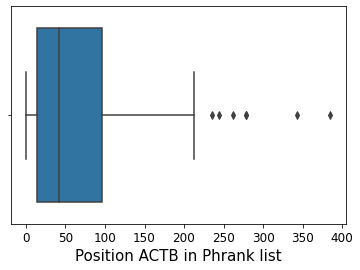

In [21]:
import seaborn as sns


ax = sns.boxplot(x=l_ACTB)
ax.tick_params(labelsize=12)
ax.set_xlabel("Position ACTB in Phrank list",fontsize=15)

In [ ]:
l_ACTB = [200,42,15,32,8,124,43,21,7,10,278,385,44,57,35,235,50,211,6,161,146,42,22,75,8,11,26,74,8,15,3,70,102,195,59,17,58,42,18,43,55,81,162,30,90,77,17,61,7,151,8,16,244,3,0,9,191,114,24,2,27,41,27,145,163,38,3,15,134,0,74,61,68,0,74,75,0,115,117,262,80,1,94,213,0,279,2,343,2,16,4,20,0,18,17,55,40,179,13,33]

In [11]:
l_ACTG1 = [79,3,43,21,42,213,5,0,31,15,99,16,211,10,6,0,9,1,96,51,23,61,120,3,76,1,8,3,96,1,5,14,1,6,57,11,54,43,22,163,4,4,38,28,73,37,2,2,4,43,52,15,14,41,24,28,15,2,2,66,373,64,144,112,4,44,2,1,0,3,268,32,2,6,6,12,4,15,2,8,33,9,1,7,0,12,15,2,10,29,2,6,23,8,78,0,53,13,2,10]
l_ACTB = [200,42,15,32,8,124,43,21,7,10,278,385,44,57,35,235,50,211,6,161,146,42,22,75,8,11,26,74,8,15,3,70,102,195,59,17,58,42,18,43,55,81,162,30,90,77,17,61,7,151,8,16,244,3,0,9,191,114,24,2,27,41,27,145,163,38,3,15,134,0,74,61,68,0,74,75,0,115,117,262,80,1,94,213,0,279,2,343,2,16,4,20,0,18,17,55,40,179,13,33]
l_IARS = [745,820,1270,142,855,294,657,197,1434,623,214,185,1099,611,702,701,537,740,95,746,1006,992,674,969,803,408,64,258,520,78,846,130,462,419,589,1628,184,156,51,85,556,115,439,116,258,158,97,1209,714,1070,416,557,418,321,65,264,274,256,1502,320,167,525,595,958,104,303,318,347,839,866,321,1133,42,883,528,538,795,718,468,184,478,1062,654,903,620,1332,241,269,85,354,327,1043,916,646,99,1234,903,13,368,738]

## Plot histogram ACTG1

(array([70., 16.,  6.,  3.,  1.,  2.,  0.,  1.,  0.,  1.]),
 array([  0. ,  37.3,  74.6, 111.9, 149.2, 186.5, 223.8, 261.1, 298.4,
        335.7, 373. ]),
 <a list of 10 Patch objects>)

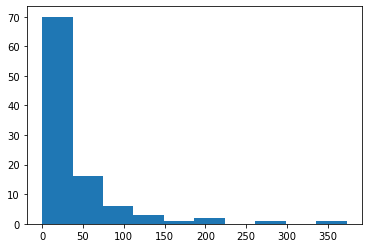

In [105]:
import matplotlib.pyplot as plt
n_bins = 10


plt.hist(list_pos_genes, bins=n_bins)


# Dataset #2 ACTG / ACTB

In [4]:
non_null_columns = [col for col in df_actb.columns if (df_actb.loc[:, col]==1).any()]

In [7]:
len(non_null_columns), len(df_actb.columns)

(92, 97)

In [23]:
import pandas as pd
df_actb = pd.read_csv(r'data/ACTB/ACTB_data.csv', sep=',', header=0)
df_actg1 = pd.read_csv(r'data/ACTG1/ACTG1_data.csv', sep=',', header=0)
df_nat6 = pd.read_csv(r'data/NAT6/NAT6_data.csv', sep=',', header=0)
df_actb.head()

,Category,Id,Protein,High frequency hearing loss,Short stature,microcephaly,hearing loss,ID,Developmental delay (Global),Motor Delay,...,Recurrent infections,Photosensitivity,Polyarthralgia,Hepatomegaly,Hypothyroidism,Leukocytose,Trombocytopenie,Asthma,Strabismus,Growth hormone deficiency
0,Gain Of Function,61456,p.Arg196Cys,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
1,Gain Of Function,58248,p.Arg196His,0,0,0,0,1,1,0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
2,Gain Of Function,59169,p.Arg196His,0,1,1,0,1,0,0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
3,Gain Of Function,LR04-173,p.Arg196His,0,1,1,1,1,0,0,...,0,0.0,0.0,0.0,0,0,0,0,0,0
4,Gain Of Function,LR09-079,p.Arg196His,0,1,1,0,1,0,0,...,0,0.0,0.0,0.0,0,0,0,0,0,0


In [24]:
df_actg1['Category'] = df_actg1['Category'] + ' (ACTG1)'
df_actb['Category'] = df_actb['Category'] + ' (ACTB)'
df_actb['Origin'] = 'ACTB'
df_actg1['Origin'] = 'ACTG1'
#df_nat6['Origin'] = 'NAT6'

### Fix typo's and create new category names

In [25]:
cols = list(df_actg1.loc[:, ~df_actg1.columns.isin(['Category', 'Id', 'Protein', 'Origin'])].columns)

#df_all = df_actg1.copy() 
df_all = pd.concat([df_actg1, df_actb], ignore_index=True) # df_actg1.copy() 
df_all = pd.concat([df_all, df_nat6], ignore_index=True) # 
df_all = df_all.rename(columns={"Retrognatia/micrognathia" : "Retrognathia/micrognathia", "Leukocytose": "Leukocytosis", "Trombocytopenie": "thrombocytopenia", "Other Psychiatric diagnosis (shizofrenia, depression, other, not autism, or ADHD/ADD)" : "Other Psychiatric diagnosis (schizophrenia, depression, other, not autism, or ADHD/ADD)", "Mid face hypoplasia": "Midface hypoplasia"})
df_all['Category'] = df_all['Category'].replace({'Other/Myosin binding (ACTG1)': 'Other (ACTG1)', 'Other/Fimbrin binding (ACTG1)': 'Other (ACTG1)', 'N-terminus (ACTG1)': 'Other (ACTG1)', 'N-terminus (ACTB)': 'Other (ACTB)'})

df_pheno = df_all.copy()

## 2.3 Translate headers
In order to calculate the HRSS it is important to translate the headers to the corresponding HPO-codes!

In [26]:
import columns_linked_to_hpo
def infer_HPO(row, column_to_hpo):
    hpo_list = []
    cols = list(row.index)
    for i in cols:
        val = row[i]
        #print(val)
        if val == 1:
            col = i.lower().strip()
            if (col in column_to_hpo.keys()) == False :
                print(col, col in column_to_hpo.keys())
            if col in column_to_hpo.keys():
                if type(column_to_hpo[col]) == list:
                    hpo_list.extend(column_to_hpo[col])
                else :
                    hpo_list.append(column_to_hpo[col])
    return hpo_list

hp_patients = list(df_all.apply(lambda x: infer_HPO(x, columns_linked_to_hpo.column_to_hpo) , axis= 1))

persistent embryonic sructures False
persistent embryonic sructures False
persistent embryonic sructures False
polyarthralgia False
persistent embryonic sructures False
persistent embryonic sructures False


### Save PhenoTable to file

In [69]:
with open('data/deepdata/actg_patpheno.csv', 'w') as f:
    cnt = 0
    for pat in df_all['Id']:
        f.write(str(pat) + ',' + ','.join(hp_patients[cnt]) + '\n')
        cnt +=1

# Dataset #3 COG

In [37]:
import pandas as pd
df_cog_all = pd.read_csv(r'data/COG/COG.csv', sep=';', header=0)
#df_nat6 = pd.read_csv(r'data/NAT6/NAT6_data.csv', sep=',', header=0)
df_cog_all.head()

,Index,Superclass,Clinical feature,HPO code,COG1,COG2,COG4,COG5,COG6,COG7,COG8,All,Ass. genes,Occ. ratio,Unnamed: 14
0,1,1,Abnormality of blood or blood-forming tissues,HP:0001871,1,1,2,1,9,2,1,17,944,0.018,NaN
1,2,2,Abnormal bleeding,HP:0001892,0,0,0,0,4,1,1,6,340,0.018,NaN
2,3,3,Gingival bleeding,HP:0000225,0,0,0,0,1,0,0,1,27,0.037,NaN
3,4,3,Epistaxis,HP:0000421,0,0,0,0,1,0,0,1,60,0.017,NaN
4,5,4,"Spontaneous, recurrent epistaxis",HP:0004406,0,0,0,0,1,0,0,1,4,0.250,NaN


### Option 1: all COGs

In [38]:
hpo_list = df_cog_all.sort_values('Occ. ratio', ascending=False).head(10)['HPO code'].values

### Option 2: Per COG subgroup

In [2]:
import pandas as pd
df_cog_split = pd.read_csv(r'data/COG/JMID_split_patients.csv', sep=';', header=0,index_col=0)
df_cog_split = df_cog_split.apply(lambda x: x.str.replace(',','.'))

In [ ]:
df_cog_split.sort_values('COG2', axis=1, ascending=False)

In [66]:
hpo_list = df_cog_split.sort_values('COG8', axis=1, ascending=False).columns[:10].values

In [7]:
df_cog_split['HP:0001871']

HPOcode
COG1    0.0000011
COG2      0.00106
COG4      0.00212
COG5       0.0011
COG6       0.0095
COG7       0.0021
COG8       0.0011
Name: HP:0001871, dtype: object

In [28]:
df_hrss = df_hrss.rename_axis('Id').reset_index()

,Id,0,1,2,3,4,5,6,7,8
0,0,0.422868,0.155740,0.250735,0.103815,0.103815,0.096273,0.090208,0.131889,0.111612
1,1,0.155740,0.386267,0.231097,0.108952,0.108952,0.102197,0.095203,0.136614,0.133293
2,2,0.250735,0.231097,0.431094,0.088773,0.088773,0.082023,0.075700,0.151009,0.185922
3,3,0.103815,0.108952,0.088773,0.254624,0.254624,0.214028,0.201439,0.075983,0.064385
4,4,0.103815,0.108952,0.088773,0.254624,0.254624,0.214028,0.201439,0.075983,0.064385
5,5,0.096273,0.102197,0.082023,0.214028,0.214028,0.230756,0.222643,0.064439,0.053277
6,6,0.090208,0.095203,0.075700,0.201439,0.201439,0.222643,0.235013,0.060575,0.047861
7,7,0.131889,0.136614,0.151009,0.075983,0.075983,0.064439,0.060575,0.411942,0.116681
8,8,0.111612,0.133293,0.185922,0.064385,0.064385,0.053277,0.047861,0.116681,0.461902
